- https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.vq.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.kmeans.html

**Why k-means clustering?**<br/>
We explored a critical issue in hierarchical clustering in the last chapter - runtime.

To perform K-Means clustering in scipy, there are two steps involved - generate the cluster centers and then assign the cluster labels. The first step is performed by the kmeans method. The k-means function returns two arguments, the cluster centers and distortion. The cluster centers, is also known as the code book.
- In K-means clustering, distortion refers to the sum of squared distances between each data point and its assigned cluster center. It's also commonly known as the "within-cluster sum of squares" (WCSS).

The next step is to use the vq method to generate cluster labels.The function returns the cluster labels, also known as the "code book index" and the distortion.

**A note on distortions**<br/>
kmeans returns a single value of distortions based on the overall data, whereas vq returns a list of distortions, one for each data point. The mean of the list of distortions from the vq method should approximately equal the distortion value of the kmeans method if the same list of observations is passed.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
comic_con = pd.read_csv('/content/comic_con.csv')
comic_con.head()

,x_coordinate,y_coordinate
0,17,4
1,20,6
2,35,0
3,14,0
4,37,4


In [ ]:
# normalize data for clustering
from scipy.cluster.vq import whiten

# Use the whiten() function to standardize the data
comic_con['x_scaled'] = whiten(comic_con['x_coordinate'])
comic_con['y_scaled'] = whiten(comic_con['y_coordinate'])

comic_con.head()

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,17,4,0.509349,0.090010
1,20,6,0.599234,0.135015
2,35,0,1.048660,0.000000
3,14,0,0.419464,0.000000
4,37,4,1.108583,0.090010


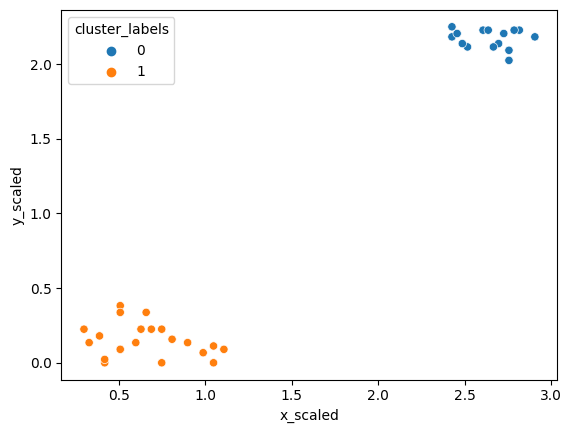

In [ ]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled',
                hue='cluster_labels', data = comic_con)
plt.show()